In [2]:
# ================================
# EMPLOYEE ATTRITION ANALYSIS
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# 2. Load Dataset
# Download dataset from Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  

In [4]:
# 3. Data Cleaning & Preprocessing
# Drop EmployeeNumber (ID column not useful)
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop('Attrition', axis=1)
y = df['Attrition']   # 1 = Yes, 0 = No after encoding

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

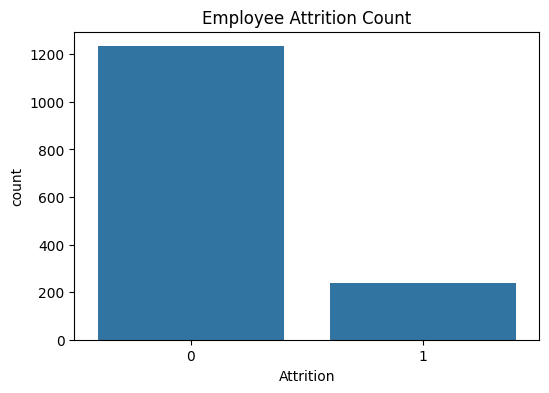

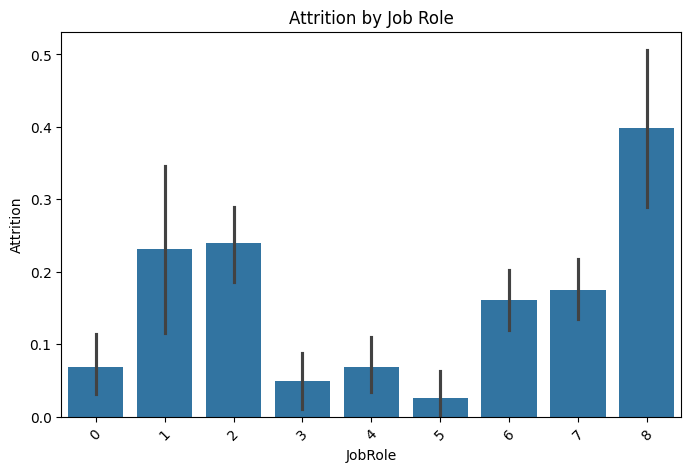

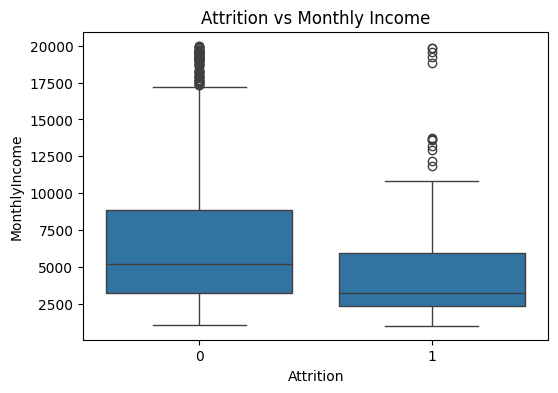

In [5]:
# 5. Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Count")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="JobRole", y="Attrition", data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Attrition vs Monthly Income")
plt.show()

In [6]:
# 6. Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



In [7]:
# 7. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.8367346938775511
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



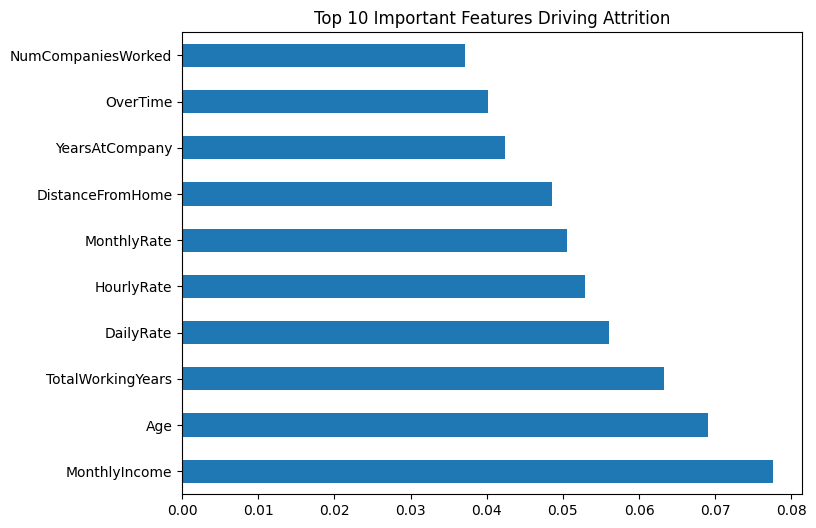

In [8]:
# 8. Feature Importance from Random Forest
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features Driving Attrition")
plt.show()

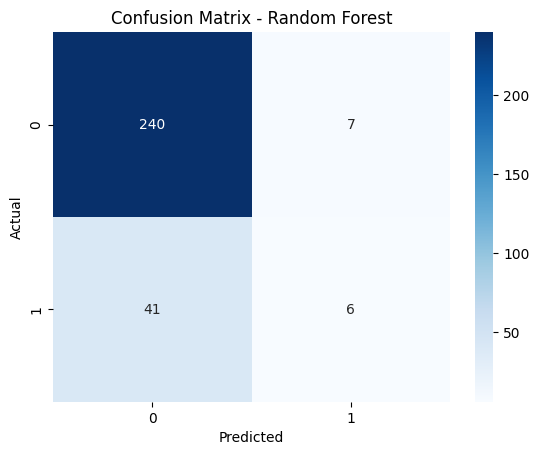

In [9]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()